## 03. Feature Engineering & 다양한 알고리즘을 이용해 보기
 * 새로운 변수 만들기 
 * 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

```
Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
Categorical Features: Survived, Sex, Embarked, Pclass
Alphanumeric Features: Ticket, Cabin
```

### 시각화

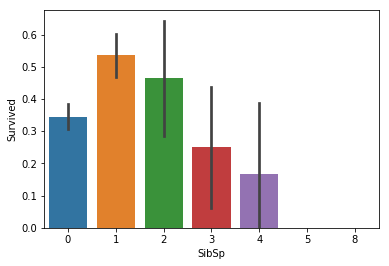

In [6]:
# 01. 배우자 또는 형제가 적을 수록 생존할 가능성이 올라간다.
# 02. 1,2명일 때 생존할 가능성이 올라간다.
sns.barplot(x="SibSp", y="Survived", data=train)

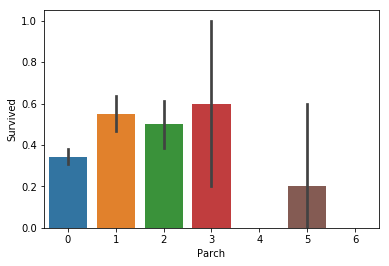

In [7]:
# 부모 또는 아이 동반자가 많을 경우 생존 가능성이 떨어진다.
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [15]:
train['Died'] = 1 - train['Survived']

C:\Users\WITHJS\Anaconda3\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


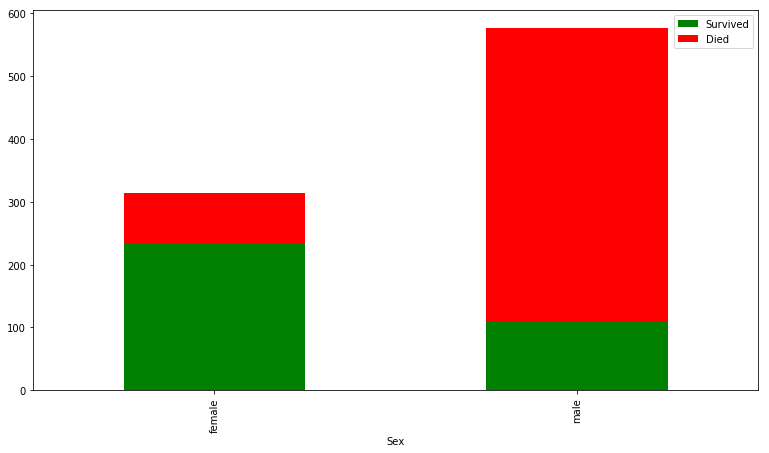

In [21]:
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(13, 7),
                                                          stacked=True, colors=['g', 'r']);

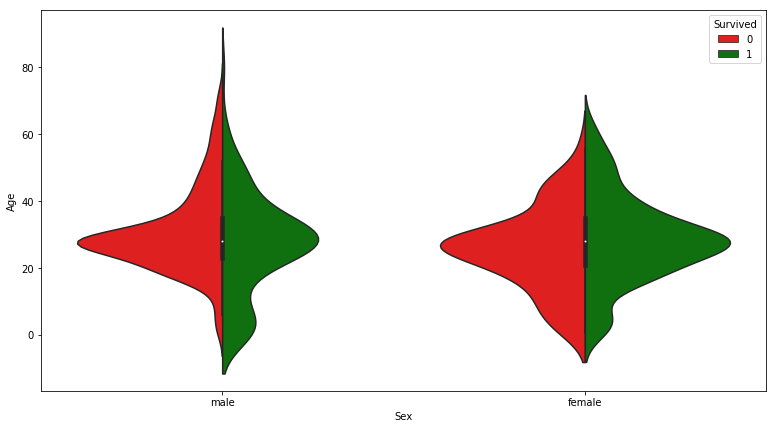

In [22]:
fig = plt.figure(figsize=(13, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train, 
               split=True,    # 사망 생존을 하나로 만든다.
               palette={0: "r", 1: "g"}
              );

## Age 나이대별로 확인해 보자.

In [8]:
train["Age"] = train["Age"].fillna(train['Age'].median())
test["Age"] = test["Age"].fillna(test['Age'].median())

In [12]:
print( train.info(), test.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418

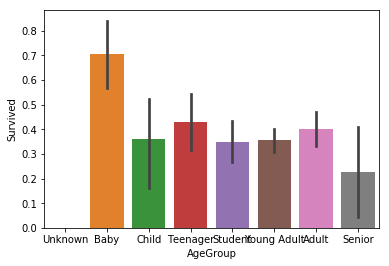

In [13]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]  # 나이대 구분
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

### Cabin Feature 확인
 * Cabin이 null이 아닐 경우

In [10]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

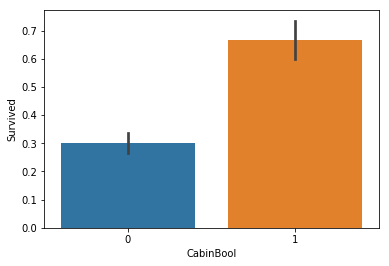

In [11]:
sns.barplot(x="CabinBool", y="Survived", data=train)

In [12]:
train["CabinBool"].value_counts()

0    687
1    204
Name: CabinBool, dtype: int64

### Cabin Feature

In [13]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature

In [14]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### Embarked Feature

In [15]:
print( train['Sex'].value_counts() )
print( train['Embarked'].value_counts() )

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [16]:
train = train.fillna({"Embarked": "S"})

### Age Feature

In [17]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
# 다양한 이름을 변경하기
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


### 수치형 값으로 그룹을 매핑하기

In [23]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

NameError: name 'combine' is not defined

In [20]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

In [21]:
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [22]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [23]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [24]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1
1,2,1,1,1,1,0,71.2833,C,6,1,3
2,3,1,3,1,0,0,7.9250,S,5,0,2
3,4,1,1,1,1,0,53.1000,S,5,1,3
4,5,0,3,0,0,0,8.0500,S,5,0,1


In [25]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4,0,1
1,2,1,1,1,1,0,71.2833,2,6,1,3
2,3,1,3,1,0,0,7.9250,1,5,0,2
3,4,1,1,1,1,0,53.1000,1,5,1,3
4,5,0,3,0,0,0,8.0500,1,5,0,1


### Fare Feature 

In [26]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

C:\Users\WITHJS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [28]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


### 모델 선택하기 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = train.drop(['Survived', 'PassengerId'], axis=1)
Y = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [31]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

79.33


In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.21


In [33]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.68


In [34]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

77.09


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

77.65


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.68


In [37]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.56


In [38]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

77.09


C:\Users\WITHJS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [39]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.68


In [2]:
import xgboost as xgb

xgb = 

In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier',
              'Xgboost'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,82.68
3,Random Forest,82.68
8,Gradient Boosting Classifier,82.68
1,KNN,81.56
4,Naive Bayes,79.33
2,Logistic Regression,78.21
6,Decision Tree,77.65
5,Linear SVC,77.09
7,Stochastic Gradient Descent,77.09


In [43]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
sub = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
sub.to_csv('multimodel_01.csv', index=False)

### 결과 Score : 0.77033

In [44]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
sub = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
sub.to_csv('multimodel_gbk_01.csv', index=False)

### 결과 Score : 0.77990